## 1. Import Basic Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set3.colors)

In [3]:
#Read train and test data
df_train = pd.read_excel('Flight_Train.xlsx')
pd.set_option('display.max_columns',None)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test = pd.read_excel('Flight_Test.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## 2. Data Cleaning and EDA

### 2.1 Data Preprocessing

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
df_train.shape

(10683, 11)

In [8]:
#Similarly for the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
df_test.shape

(2671, 10)

In [10]:
#The feature Date_of_Journey won't be of any use to our model, since it is of object datatype.
#We'll extract the day and month from the feature. This dataset contains flights from 2019 only, therefore we'll not extract year.
import datetime as dt
df_train['Day'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.day
df_train['Month'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [11]:
#Similarly for the test dataset
df_test['Day'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.day
df_test['Month'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [12]:
#Now we can drop the Date_of_Journey feature
df_train.drop('Date_of_Journey',axis=1,inplace=True)
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
#Route doesn't provide any valuable information, therefore we'll drop the entire feature
df_train.drop('Route',axis=1,inplace=True)
df_test.drop('Route',axis=1,inplace=True)

In [14]:
#We'll extract hour and minute from Dep_Time
df_train['Departure_Hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Departure_Minute'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [15]:
#Similarly for the test data
df_test['Departure_Hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Departure_Minute'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

In [16]:
#Now we can drop the Dep_Time feature
df_train.drop('Dep_Time',axis=1,inplace=True)
df_test.drop('Dep_Time',axis=1,inplace=True)

In [17]:
df_train.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
df_train['Arrival_Hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_Minute'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [19]:
#Similarly for the test data
df_test['Arrival_Hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Minute'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [20]:
#Now we can drop the Arrival_Time feature
df_train.drop('Arrival_Time',axis=1,inplace=True)
df_test.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
duration_list = df_train['Duration'].to_list() #Convert the Duration feature to a list
hours = list() #a list to store hour valuess
minutes = list() #a list to store minute values
for i in duration_list: #traverse through each element of the list
    if len(i.split())!=2: #check whether the element contains only hour/minute 
        if 'h' in i: 
            i = i + ' 0m' #add 0 minute if only hour is present
        else:
            i = '0h ' + i #add 0 hour if only minute is present
    hours.append(int(i.split('h')[0]))
    minutes.append(int(i.split('m')[0].split()[-1]))

In [23]:
df_train['Duration_Hour'] = hours
df_train['Duration_Minute'] = minutes

In [24]:
#Similarly for the test data
duration_list1 = df_test['Duration'].to_list() #Convert the Duration feature to a list
hours1 = list() #a list to store hour valuess
minutes1 = list() #a list to store minute values
for i in duration_list1: #traverse through each element of the list
    if len(i.split())!=2: #check whether the element contains only hour/minute 
        if 'h' in i: 
            i = i + ' 0m' #add 0 minute if only hour is present
        else:
            i = '0h ' + i #add 0 hour if only minute is present
    hours1.append(int(i.split('h')[0]))
    minutes1.append(int(i.split('m')[0].split()[-1]))

In [25]:
df_test['Duration_Hour'] = hours1
df_test['Duration_Minute'] = minutes1

In [26]:
#Now we can remove the duration column
df_train.drop('Duration',axis=1,inplace=True)
df_test.drop('Duration',axis=1,inplace=True)

### 2.1 Missing Data

In [27]:
for feature in df_train.columns:
    print(feature,'has:',df_train[feature].isnull().sum(),'missing values')

Airline has: 0 missing values
Source has: 0 missing values
Destination has: 0 missing values
Total_Stops has: 1 missing values
Additional_Info has: 0 missing values
Price has: 0 missing values
Day has: 0 missing values
Month has: 0 missing values
Departure_Hour has: 0 missing values
Departure_Minute has: 0 missing values
Arrival_Hour has: 0 missing values
Arrival_Minute has: 0 missing values
Duration_Hour has: 0 missing values
Duration_Minute has: 0 missing values


In [28]:
for feature in df_test.columns:
    print(feature,'has:',df_test[feature].isnull().sum(),'missing values')

Airline has: 0 missing values
Source has: 0 missing values
Destination has: 0 missing values
Total_Stops has: 0 missing values
Additional_Info has: 0 missing values
Day has: 0 missing values
Month has: 0 missing values
Departure_Hour has: 0 missing values
Departure_Minute has: 0 missing values
Arrival_Hour has: 0 missing values
Arrival_Minute has: 0 missing values
Duration_Hour has: 0 missing values
Duration_Minute has: 0 missing values


**Observations**: There is only 1 missing value in the training data and none in the test data

### 2.3 Numerical Features

In [29]:
#Let's look at our numerical features in the dataset.
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
print('Number of numerical features:',len(numerical_features))
df_train[numerical_features].head()

Number of numerical features: 9


,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45


c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


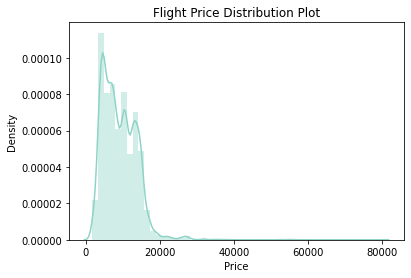

In [30]:
#Let's look at our target 'Price' distribution
sns.distplot(df_train['Price'])
plt.title('Flight Price Distribution Plot')
plt.show()

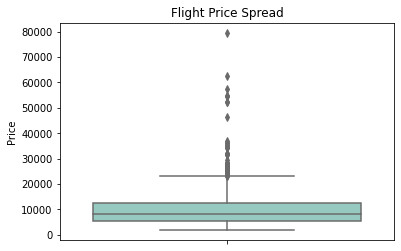

In [31]:
sns.boxplot(y=df_train['Price'])
plt.title('Flight Price Spread')
plt.show()

**Observations**: The plot is skewed to the right, indicating most of the tickets cost less than Rs 10000/-. The datapoints are far spread out from the mean indicating high variance.

In [32]:
print(df_train['Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
85%      13817.000000
90%      14714.000000
100%     79512.000000
max      79512.000000
Name: Price, dtype: float64


85% of tickets are less than Rs 13800/-, the remaining 15% are between 14700 to 79500/-

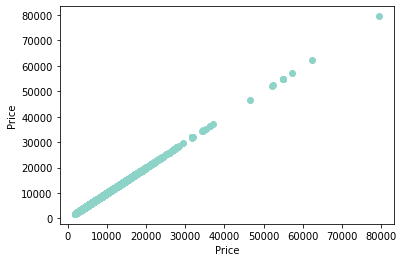

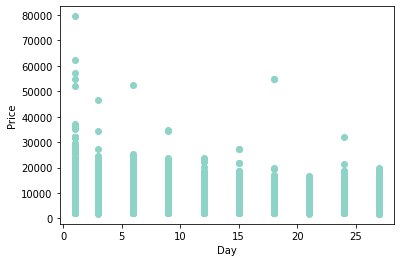

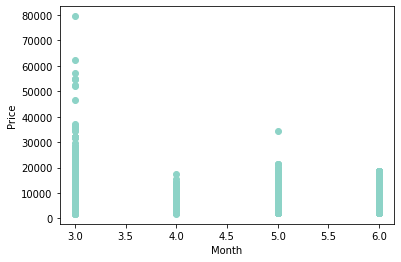

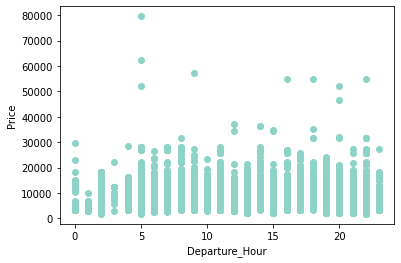

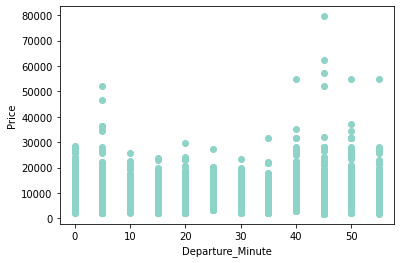

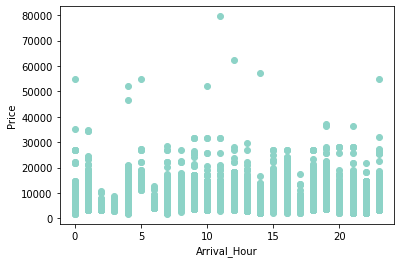

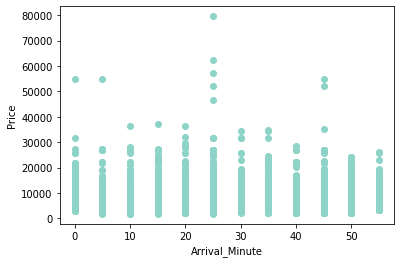

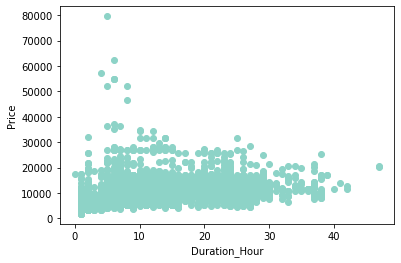

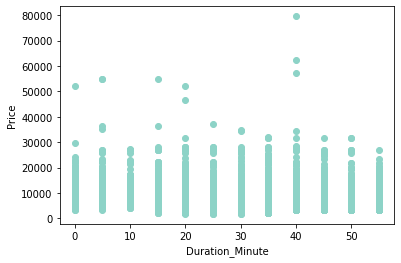

In [33]:
#Scatter plots with respect to target variable
for feature in numerical_features:
    plt.scatter(df_train[feature],df_train['Price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

**Observations**: The flight fare doesn't seem to vary much depending on the travel date, or time of travel. There isn't a particular trend of these features with respect to Price. The duration hour (i.e duration of the journey) seems to have some positive correlation with Price. 

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


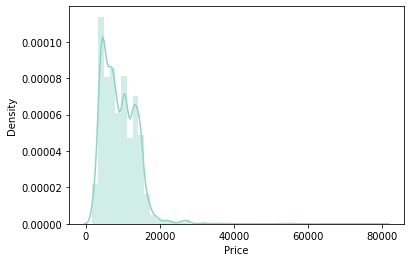

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


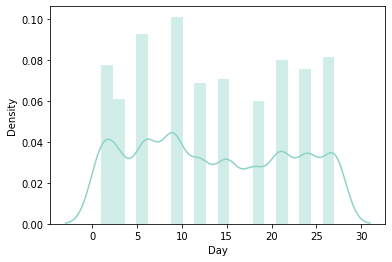

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


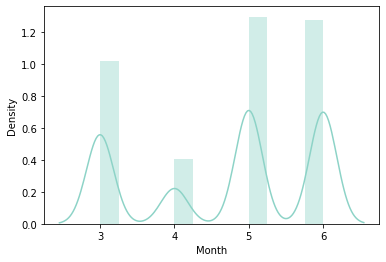

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


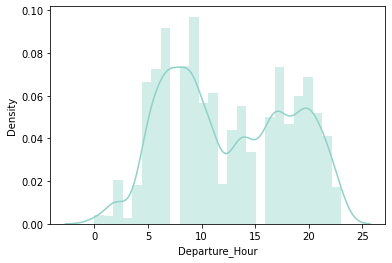

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


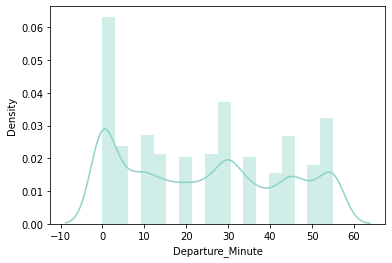

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


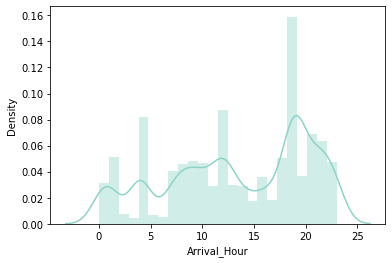

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


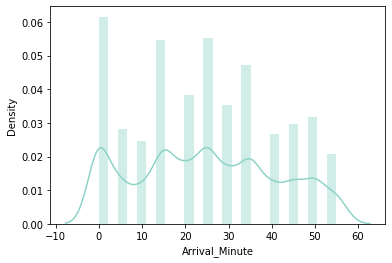

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


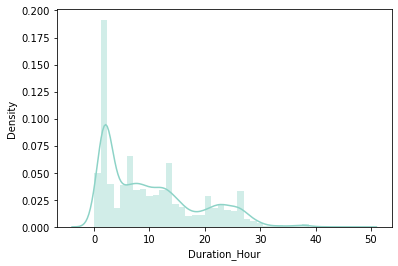

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


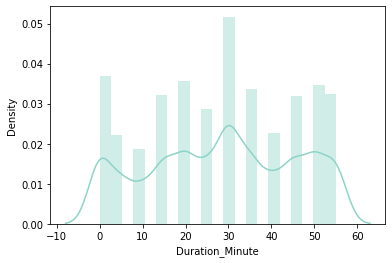

In [34]:
#Distribution Plots
for feature in numerical_features:
    sns.distplot(df_train[feature])
    plt.xlabel(feature)
    plt.show()

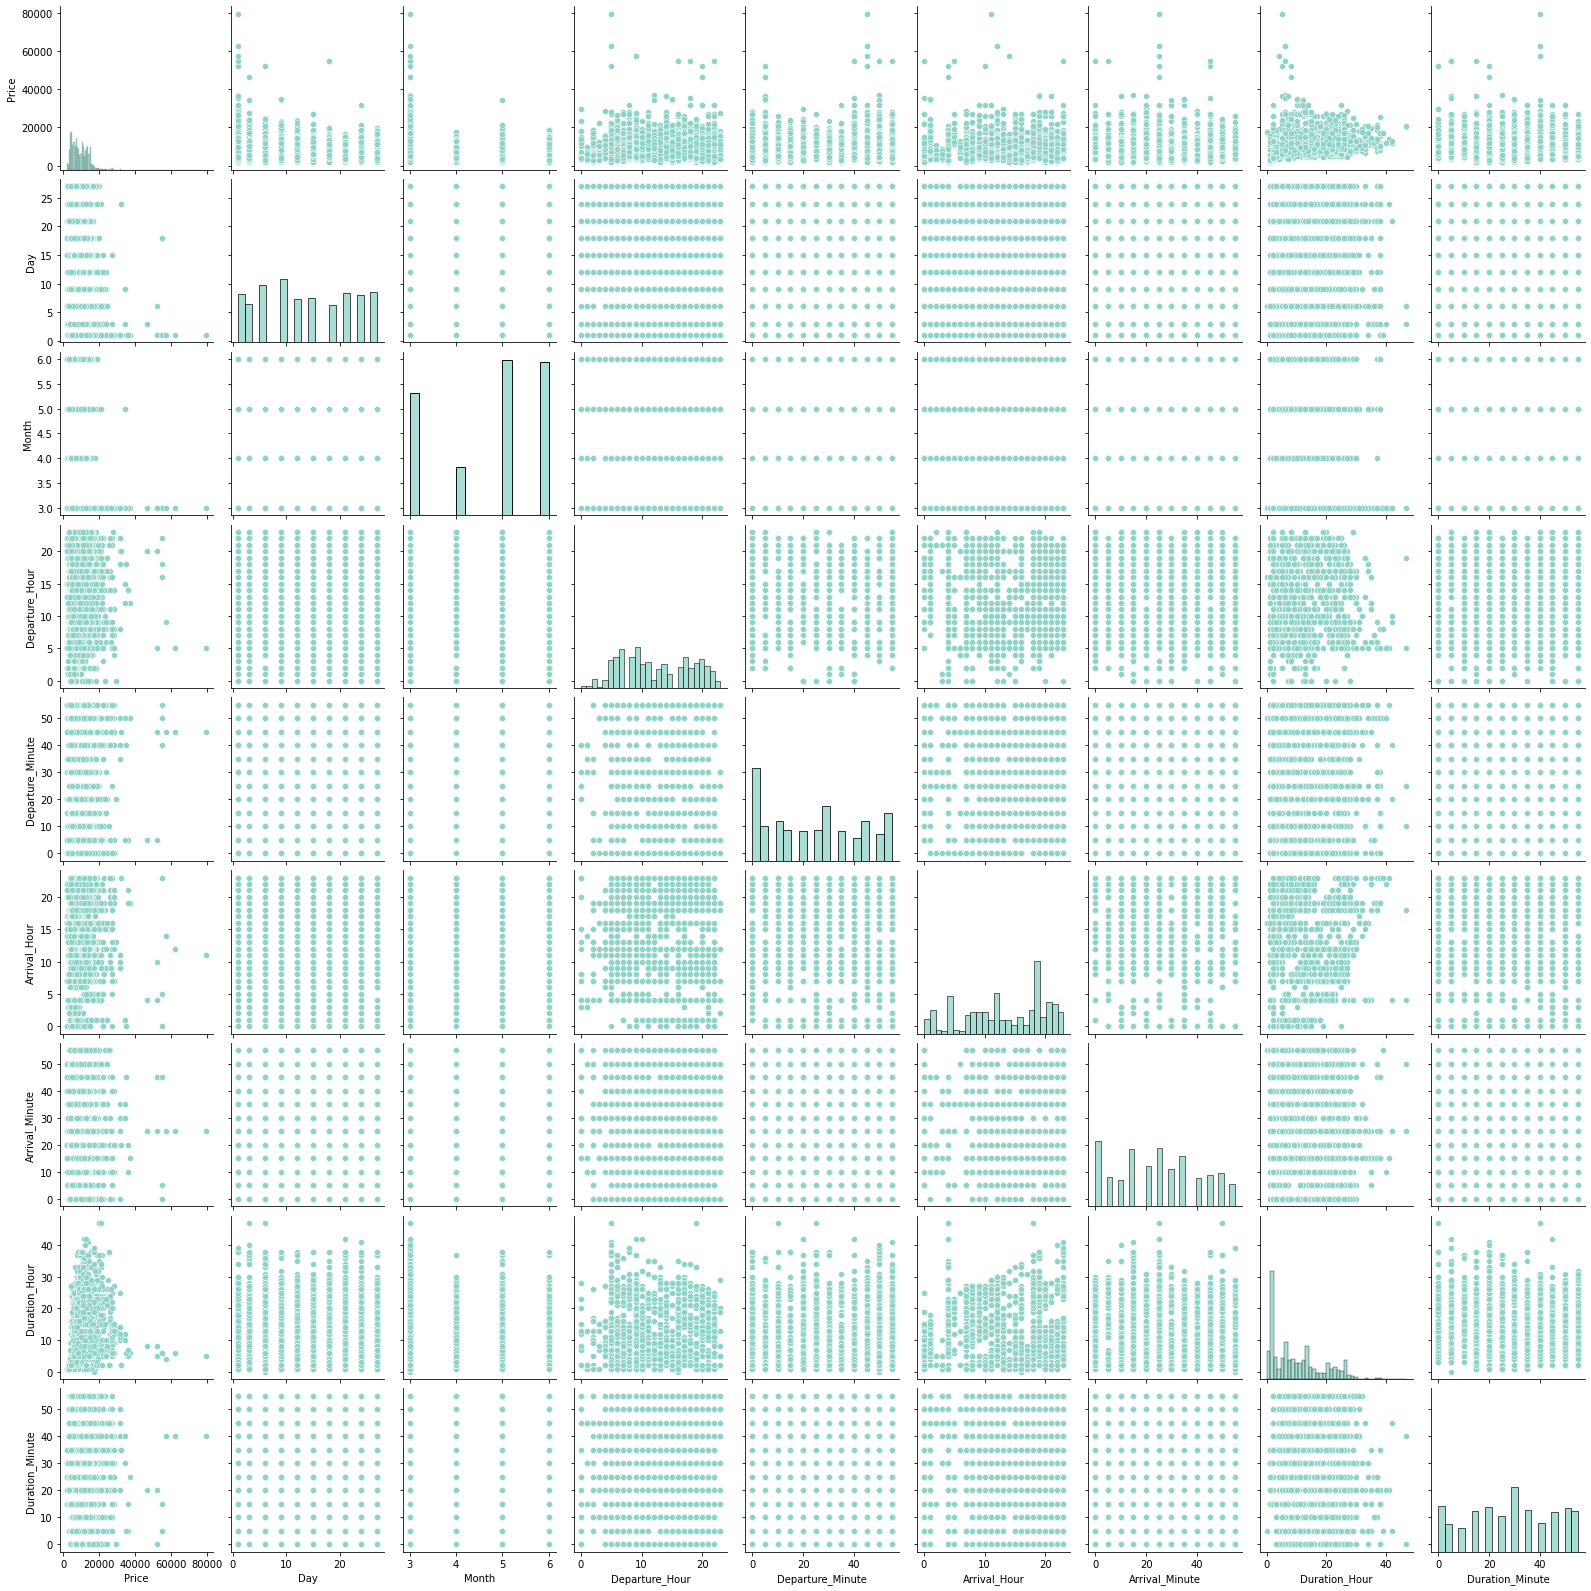

<Figure size 1440x1440 with 0 Axes>

In [35]:
sns.pairplot(df_train[numerical_features])
plt.figure(figsize=(20,20))
plt.show()

<AxesSubplot:>

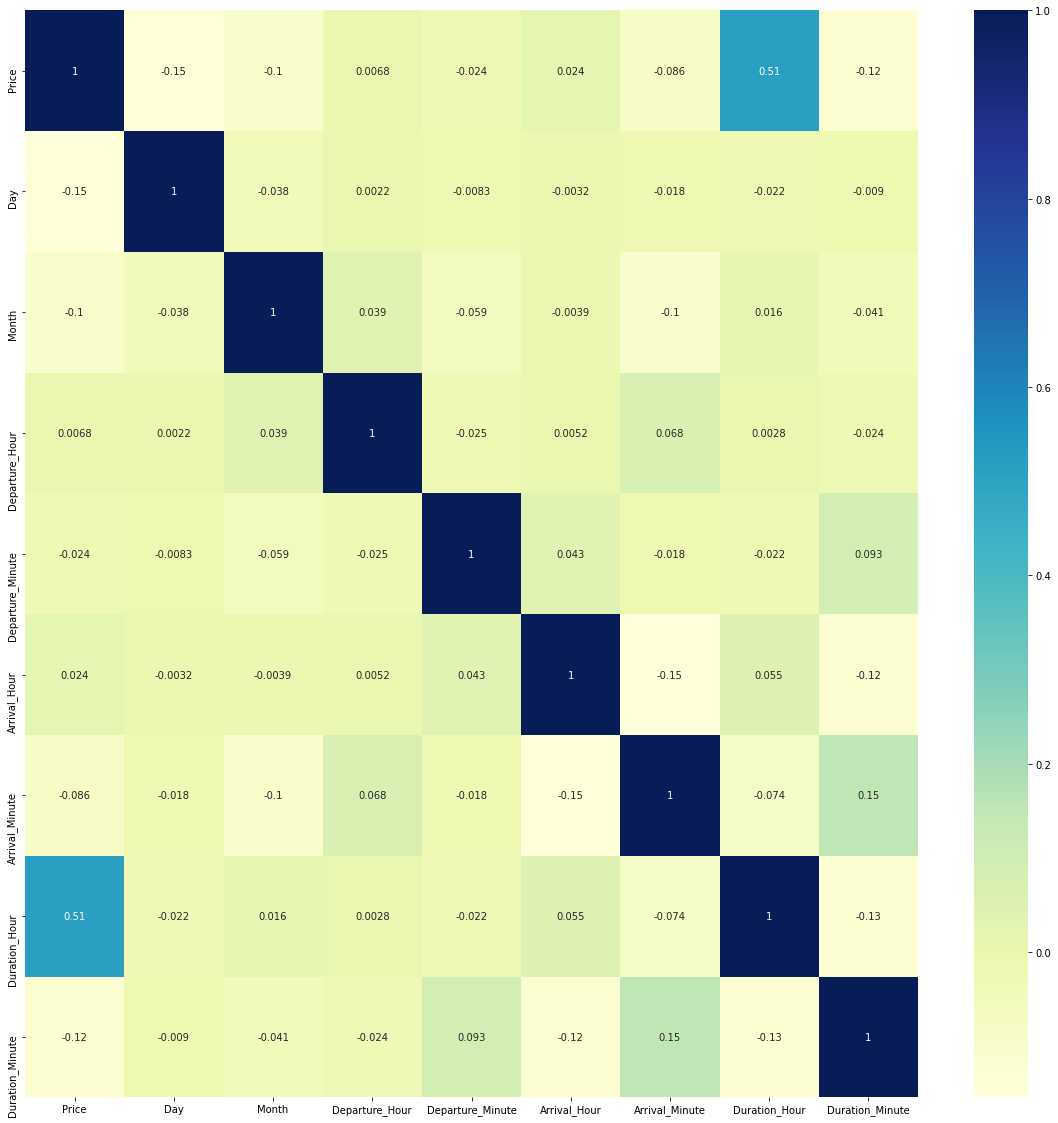

In [36]:
#Let's see the correlation between the numerical features
corr_matrix = df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

**Observations**: FLight fare has highest correlation (0.51) with Duration_Hour

### 2.4 Categorical Features

In [37]:
#Let's look at the catergorical features in the dataset
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']
print('Number of categorical features:',len(categorical_features))
df_train[categorical_features].head()

Number of categorical features: 5


,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [38]:
#Let's see how many categories are present in each feature
for feature in categorical_features:
    print(feature,'has',len(df_train[feature].unique()),'categories')

Airline has 12 categories
Source has 5 categories
Destination has 6 categories
Total_Stops has 6 categories
Additional_Info has 10 categories


In [39]:
for feature in categorical_features:
    print(feature,':',df_train[feature].unique())

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops : ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
Additional_Info : ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [40]:
#Similarly for the test dataset
for feature in categorical_features:
    print(feature,'has',len(df_test[feature].unique()),'categories')

Airline has 11 categories
Source has 5 categories
Destination has 6 categories
Total_Stops has 5 categories
Additional_Info has 6 categories


In [41]:
for feature in categorical_features:
    print(feature,':',df_test[feature].unique())

Airline : ['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Source : ['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
Destination : ['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
Total_Stops : ['1 stop' 'non-stop' '2 stops' '3 stops' '4 stops']
Additional_Info : ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']


**Observations**: As we can see that there are a number of categories in each feature. We'll have to come up with some feature encoding technique when we'll be doing Feature Engineering

In [42]:
for feature in categorical_features:
    print(df_train[feature].value_counts())
    print('------------------------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
------------------------------------------
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Na

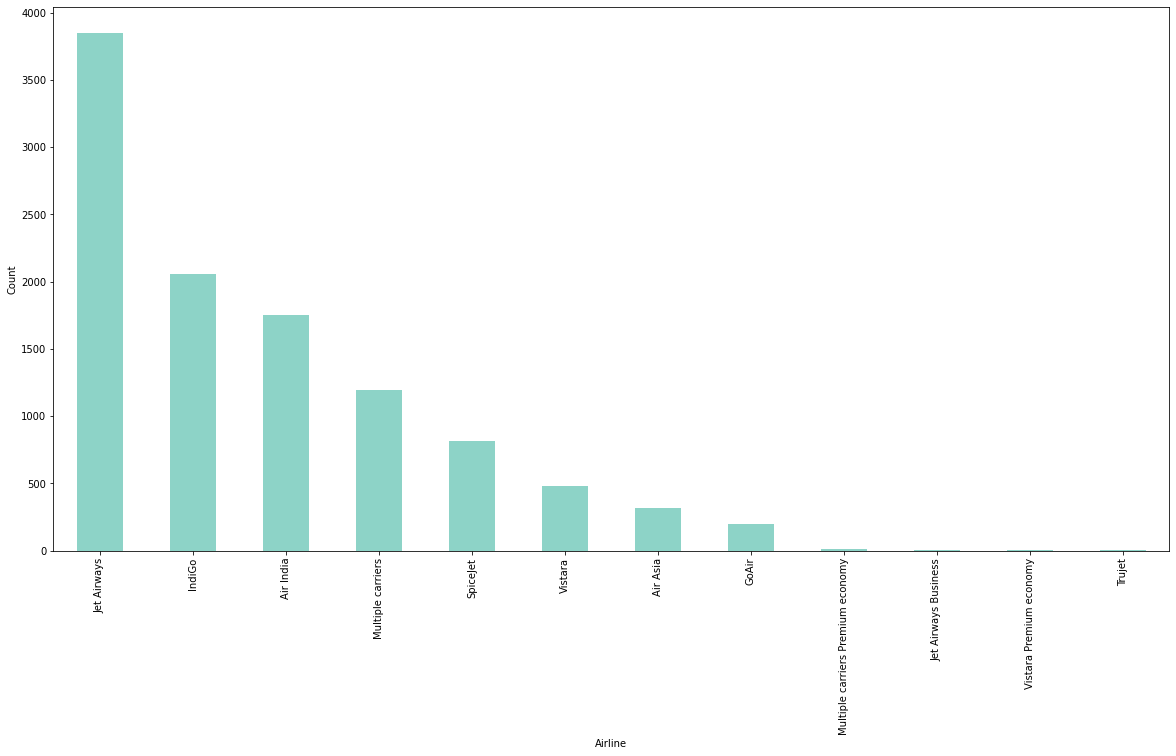

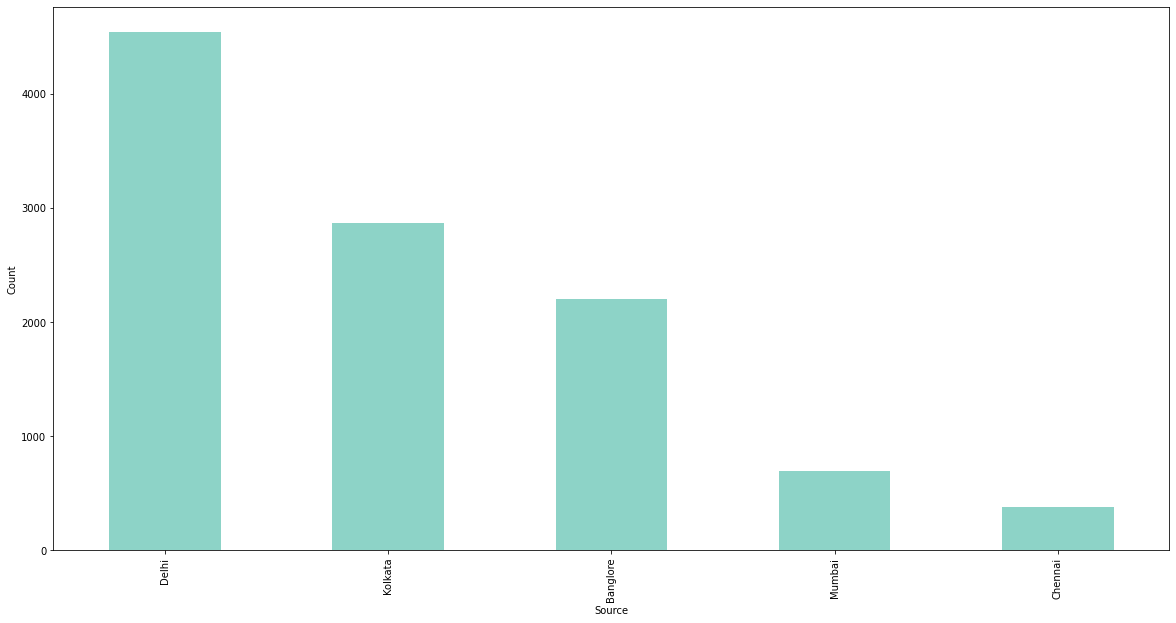

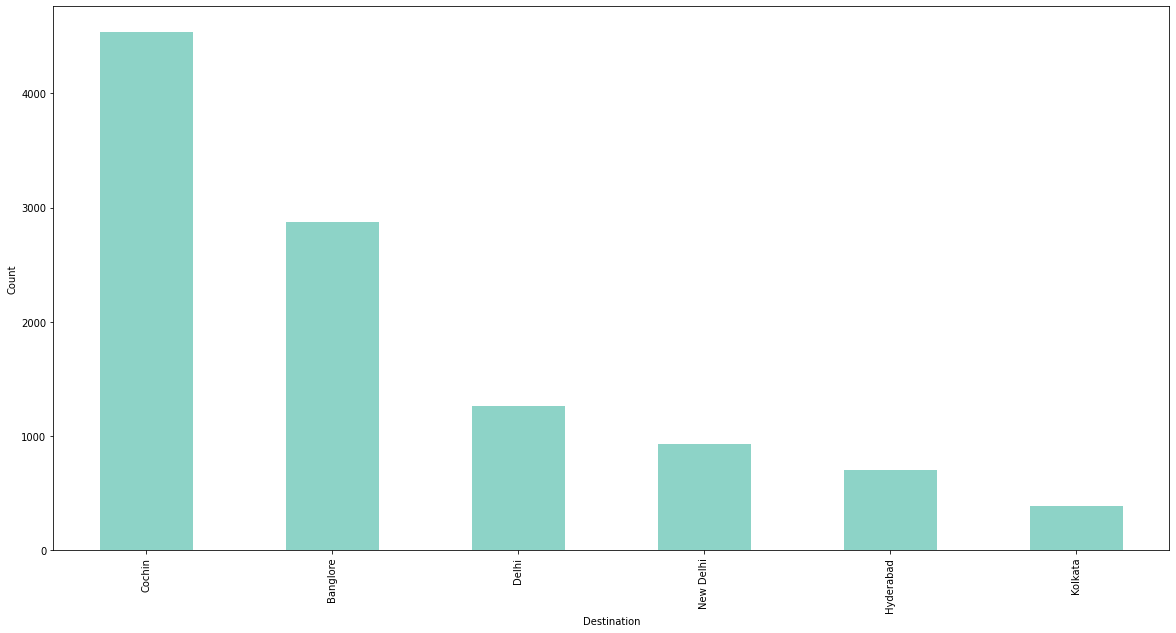

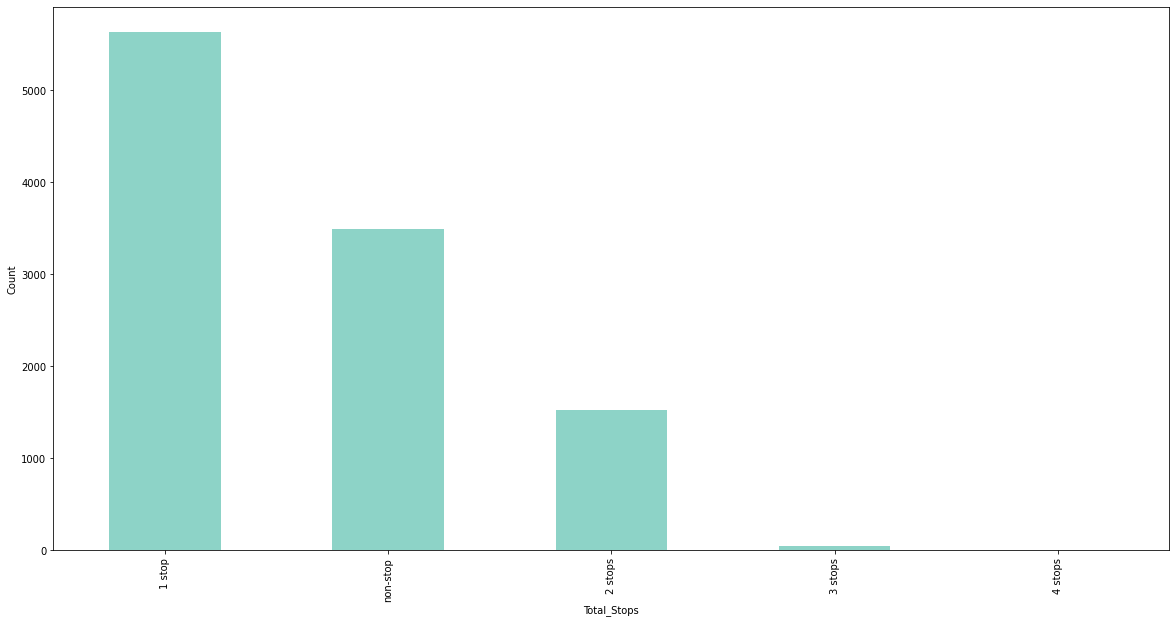

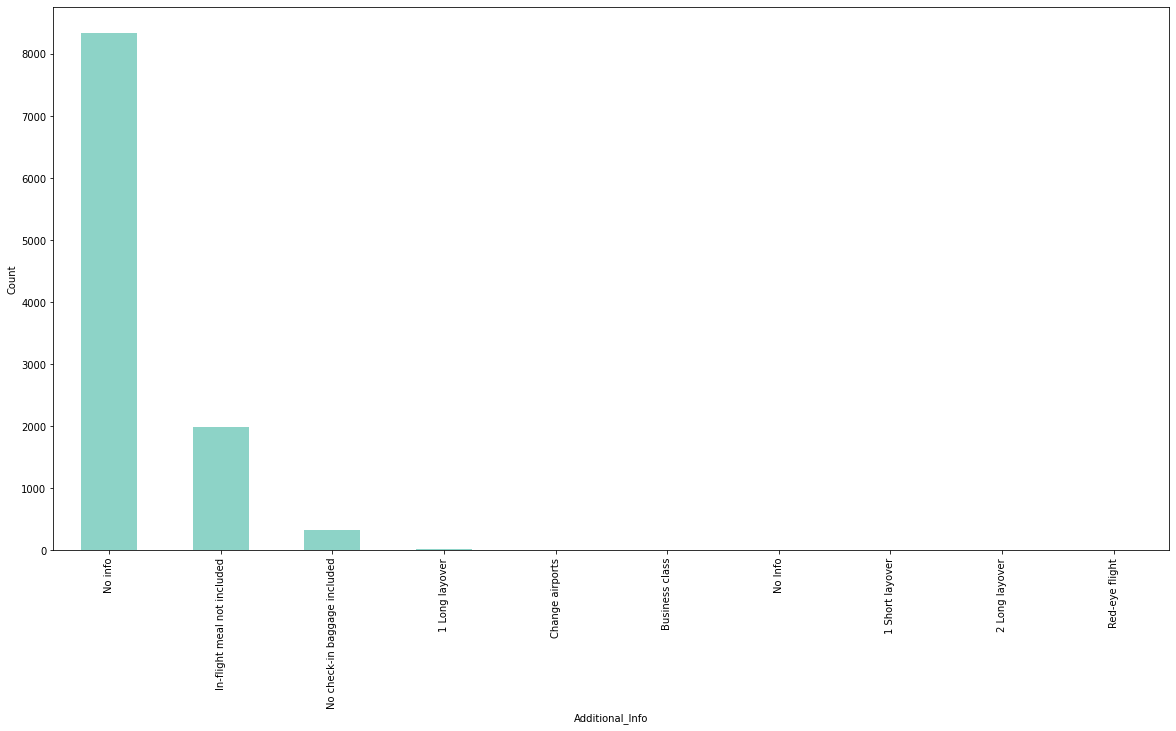

In [43]:
#Let's use barplots for visualization
for feature in categorical_features:
    plt.figure(figsize=(20,10))
    df_train[feature].value_counts().sort_values(ascending=False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**Observations**
1. Jet Airways was the most popular airline
2. Maximum flights were from Delhi
3. Cochin was the most travelled destination
4. Most of the flights had 1 stop
5. Theres Zero Additional info for 80% of the flights. We might drop the entire feature altogehter.

In [44]:
#Similarly for the test data
for feature in categorical_features:
    print(df_test[feature].value_counts())
    print('------------------------------------------')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
------------------------------------------
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64
-----------------------

Same observations as training data

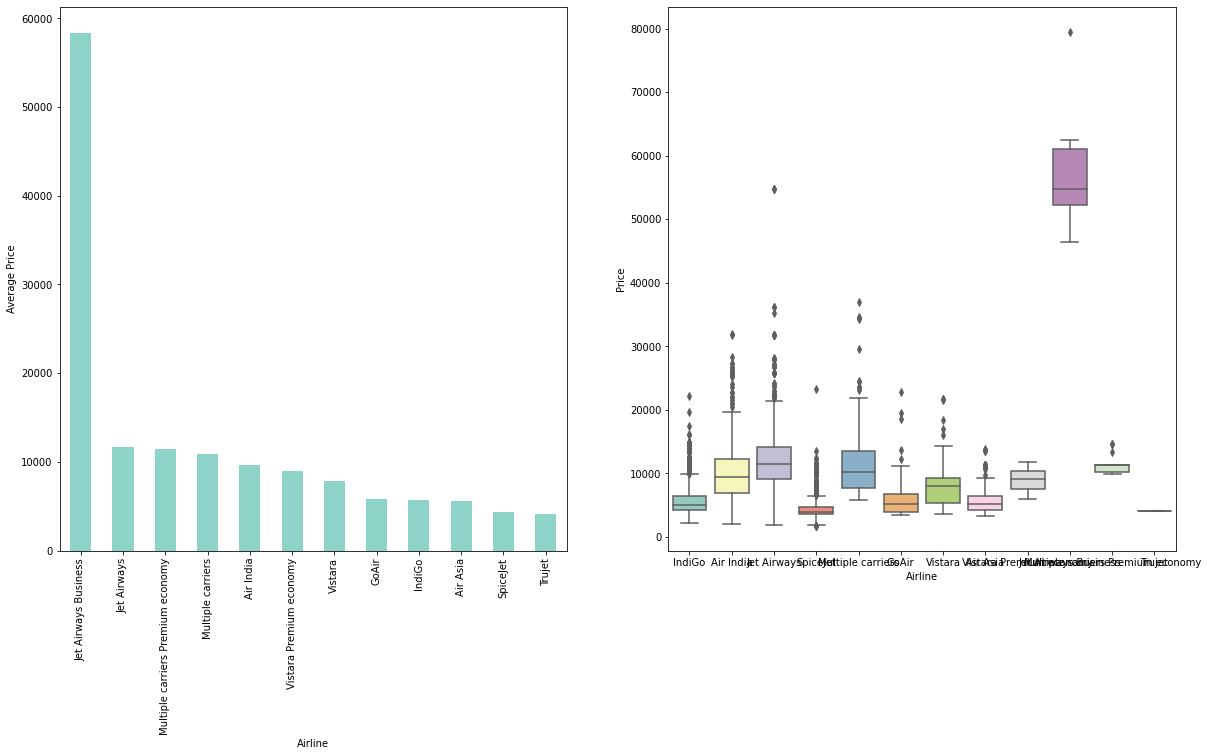

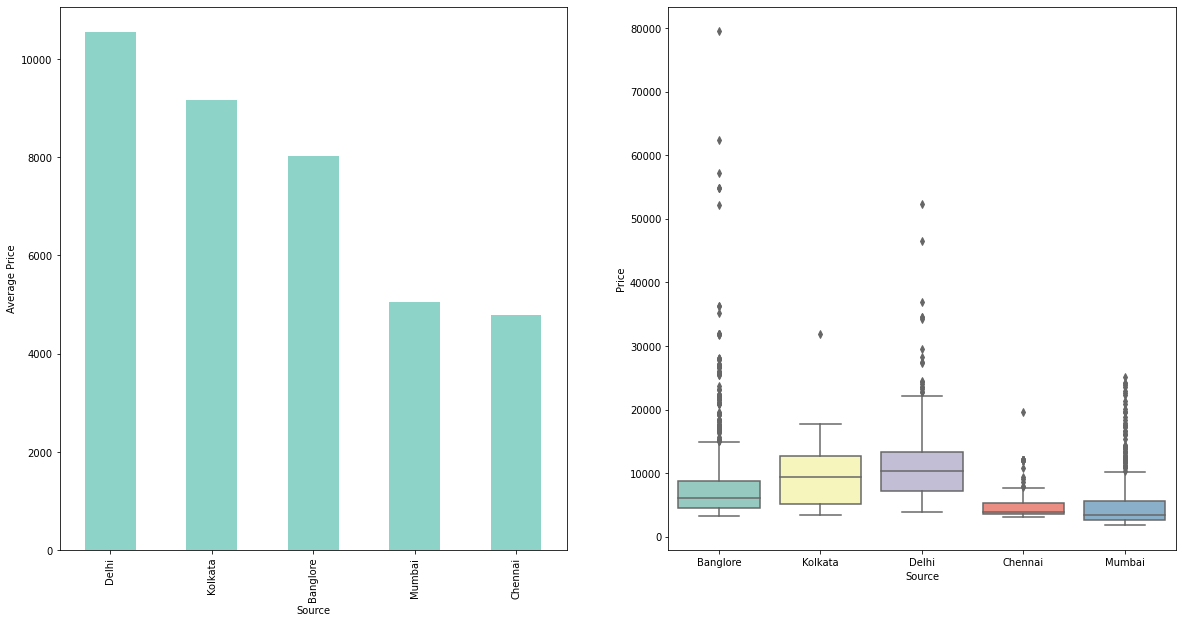

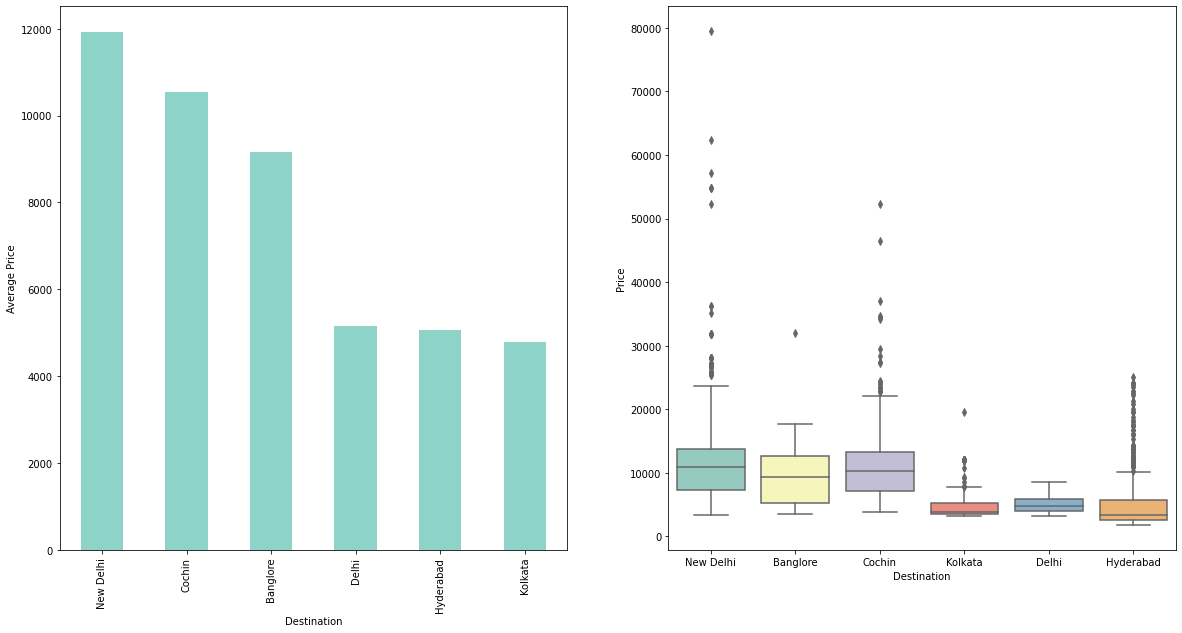

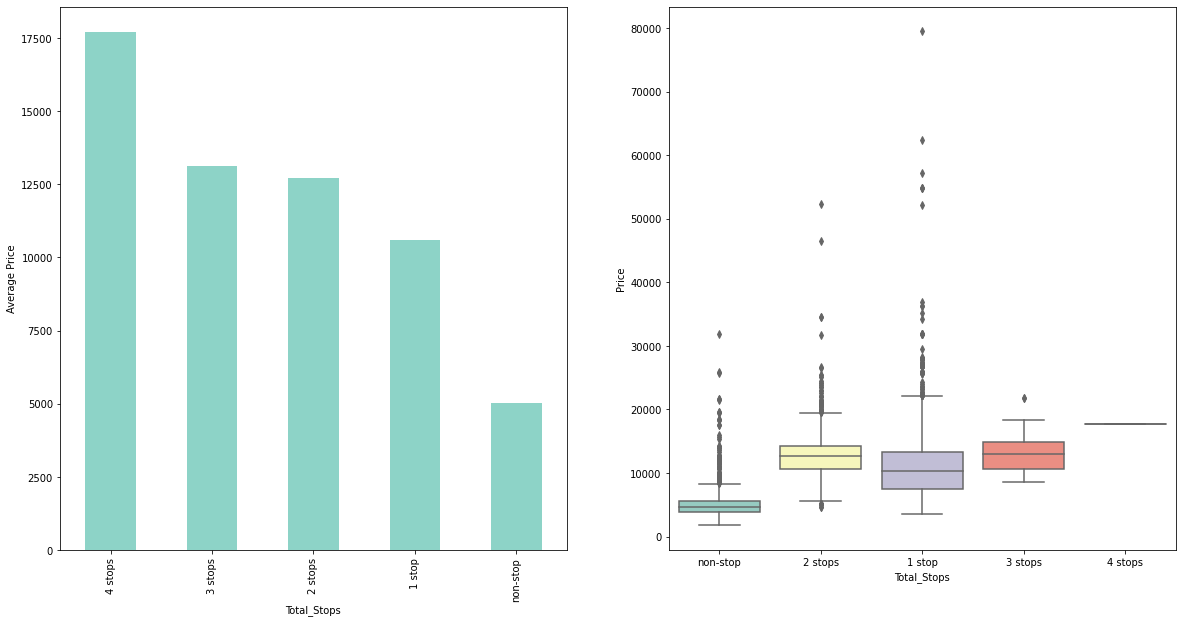

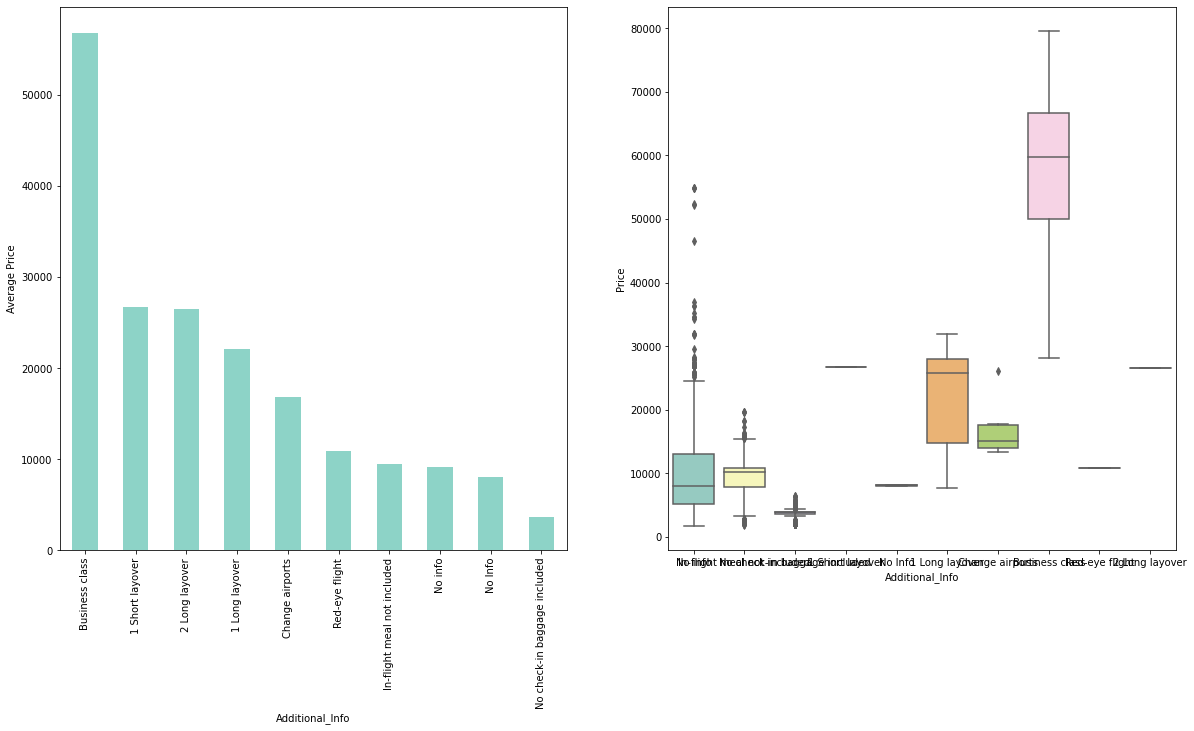

In [45]:
#Let's see how the categorical features affect our target variable Price using Boxplots/Barplots
for feature in categorical_features:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    df_train.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Average Price')
    plt.subplot(1,2,2)
    sns.boxplot(x=feature,y='Price',data=df_train)
    plt.show()

**Observations**
1. On average, Jet Airways Business was the costliest flight
2. On average, Flights from Delhi were the most expensive
3. On average, Fligts to New Delhi were the most expensive
4. On average, Flights having 4 stops were the most expensive
5. On average, People travelling from Business class paid the highest ticket price

## 3. Feature Engineering

### 3.1 Handling Categorical Features

In [46]:
#There's only 1 missing record in the Total_Stops feature, therefore we'll drop that particular record
df_train.dropna(inplace=True)

In [47]:
#Airline, Source and Destination are all nominal categorical features. Therefore we'll use OneHotEncdoing technique
Airline = df_train[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
Source = df_train[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [49]:
Destination = df_train[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [50]:
#Total_Stops is a ordinal categorical feature, therefore we'll use LabelEncoding here
Total_Stops_Map = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df_train['Total_Stops_Encoded'] = df_train['Total_Stops'].map(Total_Stops_Map)

In [51]:
#Now we can remove the Total_Stops feature
df_train.drop('Total_Stops',axis=1,inplace=True)

In [52]:
#Additional_Info contains maximum of No info category, this can lead to biased results. Therefore we'll drop this feature since it doesn't affect our target variable much.
df_train.drop('Additional_Info',axis=1,inplace=True)

In [53]:
#Now let us concatenate our new features to the dataframe and remove the old features
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [54]:
df_train = pd.concat([df_train,Airline,Source,Destination],axis=1)

In [55]:
df_train.head()

,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Total_Stops_Encoded,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
#Similarly for the test dataset
Airline = df_test[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

Source = df_test[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

Destination = df_test[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

Total_Stops_Map = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df_test['Total_Stops_Encoded'] = df_test['Total_Stops'].map(Total_Stops_Map)

df_test.drop(['Total_Stops','Additional_Info','Airline','Source','Destination'],axis=1,inplace=True)
df_test = pd.concat([df_test,Airline,Source,Destination],axis=1)

df_test.head()

,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Total_Stops_Encoded,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,4,25,10,55,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,10,20,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,0,23,45,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,21,0,13,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 3.2 Feature Selection
Let's try and see important features for our model using:  
**1. Heatmap**  
**2. VarianceThreshold**  
**3. Information Gain**  
**4. Variance Inflation Factor**

#### 3.2.1 Heatmap

<AxesSubplot:>

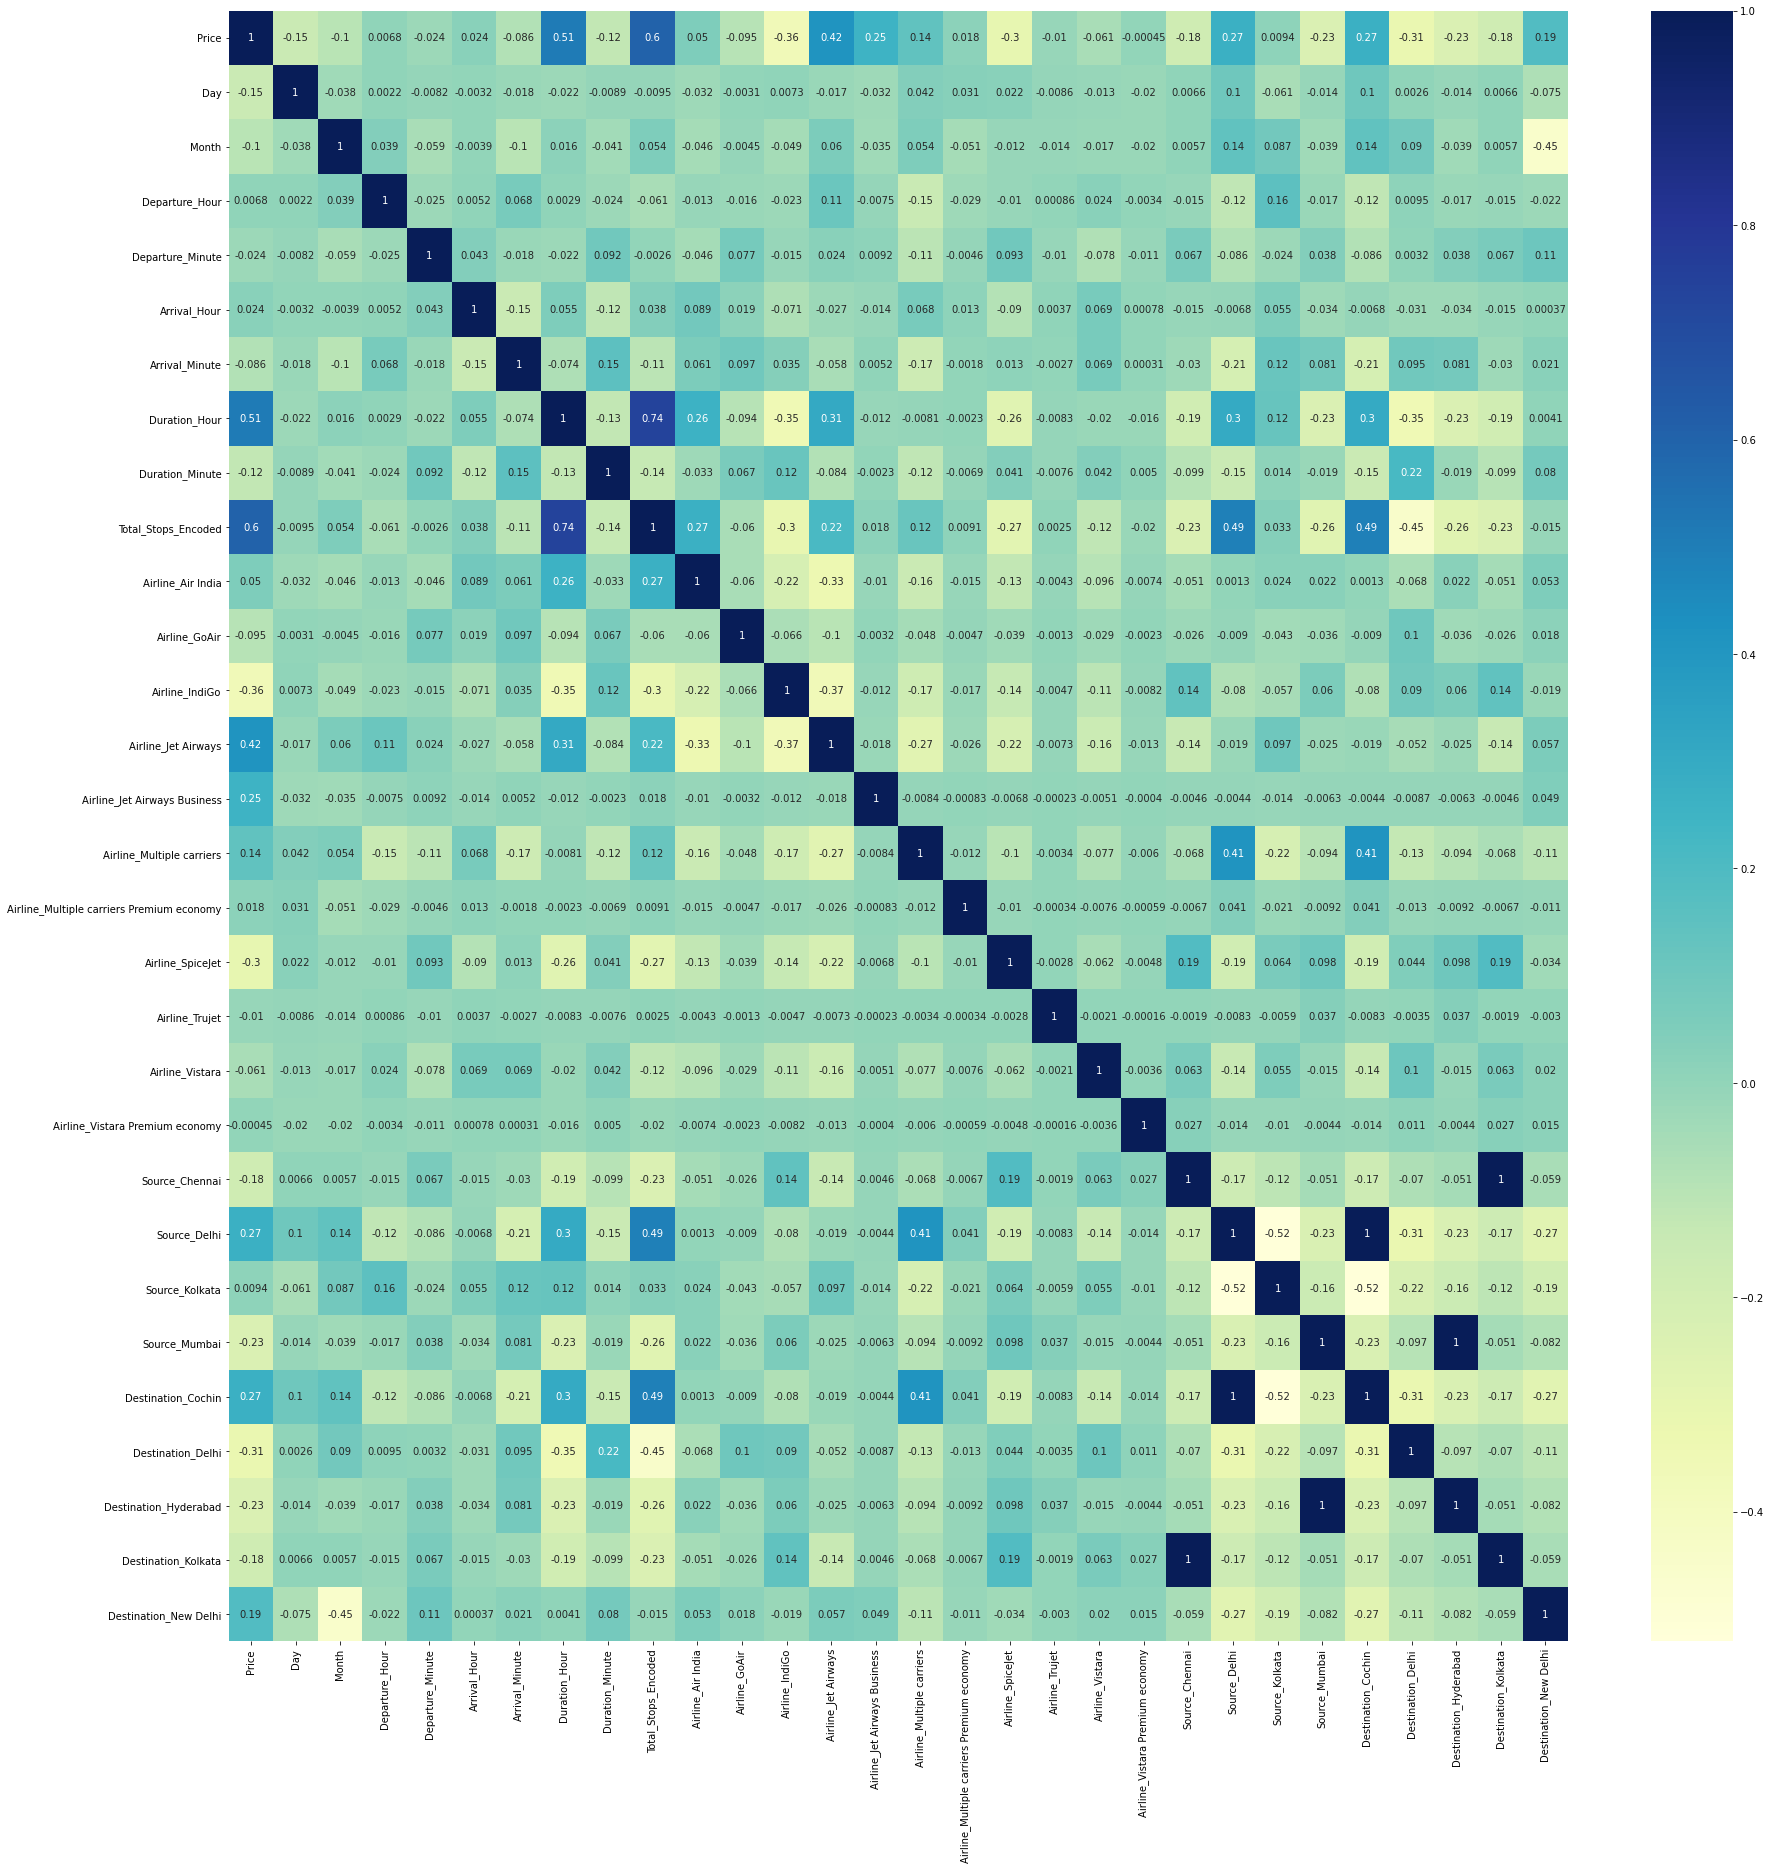

In [57]:
#Now that our dataset has been processed, let's take a look at the heatmap
corr_matrix = df_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

**Observations**: It can be seen that Duration of the flight and Total number of stops have the highest positive correlation with the Flight Fare. It can also be seen that Indigo Airlines and Spicejet have a highest negative correlation with Fare, which isn't a surprise.

In [58]:
#There appears to be a case of multicollinearity since some independent features have a high correlation (1) among each other.
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [59]:
correlation(df_train,0.9)

{'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata'}

In [60]:
#Therefore we can remove these features or their corresponding features on j axis of matrix, but first let us verify using other techniques

#### 3.2.2 Variance Threshold

In [61]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0) #Remove features having zero variance since they'll act as duplicates.
var_thres.fit(df_train)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Observations**: All the features are having some amount of variance between them, which is a good sign because features having zero variance will basically act as duplicates.

#### 3.2.3 Information Gain

In [62]:
#Now let's see the importance of features with respect to Price
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(df_train.drop('Price',axis=1),df_train['Price'])
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_train.drop('Price',axis=1).columns
mutual_info.sort_values(ascending=False)

Total_Stops_Encoded                          0.792883
Month                                        0.636434
Airline_Jet Airways                          0.545186
Source_Delhi                                 0.527631
Destination_Cochin                           0.518418
Duration_Hour                                0.473509
Source_Kolkata                               0.457880
Arrival_Hour                                 0.399770
Airline_IndiGo                               0.358675
Arrival_Minute                               0.349263
Departure_Hour                               0.345395
Duration_Minute                              0.340053
Destination_Delhi                            0.333984
Airline_Air India                            0.299817
Departure_Minute                             0.264289
Airline_Multiple carriers                    0.259425
Day                                          0.229669
Airline_SpiceJet                             0.203472
Source_Mumbai               

#### 3.2.4 Variance Inflation Factor

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = df_train.columns
vif_data['VIF'] = [variance_inflation_factor(df_train.values,i) for i in range(len(df_train.columns))]
print(vif_data)

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                      Feature        VIF
0                                       Price   2.655837
1                                         Day   1.077650
2                                       Month   1.346497
3                              Departure_Hour   1.065239
4                            Departure_Minute   1.110392
5                                Arrival_Hour   1.084056
6                              Arrival_Minute   1.141095
7                               Duration_Hour   2.595454
8                             Duration_Minute   1.144609
9                         Total_Stops_Encoded   3.687104
10                          Airline_Air India   6.246098
11                              Airline_GoAir   1.604775
12                             Airline_IndiGo   6.321734
13                        Airline_Jet Airways   9.775369
14               Airline_Jet Airways Business   1.183847
15                  Airline_Multiple carriers   5.017547
16  Airline_Multiple carriers P

In [64]:
#This indicates we need to drop our features having VIF > 10
df_train.drop(['Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi'],axis=1,inplace=True)

In [65]:
#Similarly for the test dataset
vif_data = pd.DataFrame()
vif_data['Feature'] = df_test.columns
vif_data['VIF'] = [variance_inflation_factor(df_test.values,i) for i in range(len(df_test.columns))]
print(vif_data)

                                      Feature        VIF
0                                         Day   1.016181
1                                       Month   1.330515
2                              Departure_Hour   1.082533
3                            Departure_Minute   1.110254
4                                Arrival_Hour   1.077297
5                              Arrival_Minute   1.176363
6                               Duration_Hour   2.553837
7                             Duration_Minute   1.140817
8                         Total_Stops_Encoded   3.201001
9                           Airline_Air India   5.908046
10                              Airline_GoAir   1.535983
11                             Airline_IndiGo   5.913223
12                        Airline_Jet Airways   8.448548
13               Airline_Jet Airways Business   1.033540
14                  Airline_Multiple carriers   5.060012
15  Airline_Multiple carriers Premium economy   1.042383
16                           Ai

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [66]:
df_test.drop(['Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi'],axis=1,inplace=True)

In [67]:
#Now that our dataset is ready for modelling, let's us look at the features one last time
print(df_train.shape)
print(df_test.shape)

(10682, 21)
(2671, 19)


In [68]:
df_train.head()

,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Total_Stops_Encoded,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,2,1,0,0,0,0,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,0,0,0,1,0,0,0,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,0,0,1,0,0,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,0,0,1,0,0,0,0,0,0,0,0


## 4. Model Building

In [69]:
#Let's seperate our dependent and independent variables for training and validation
X = df_train.iloc[:,1:]
Y = df_train.iloc[:,0]

In [70]:
X.head()

,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Total_Stops_Encoded,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0
1,1,5,5,50,13,15,7,25,2,1,0,0,0,0,0,0,0,0,0,0
2,9,6,9,25,4,25,19,0,2,0,0,0,1,0,0,0,0,0,0,0
3,12,5,18,5,23,30,5,25,1,0,0,1,0,0,0,0,0,0,0,0
4,1,3,16,50,21,35,4,45,1,0,0,1,0,0,0,0,0,0,0,0


In [71]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [72]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X,Y)

ExtraTreesRegressor()

In [73]:
print(ETR.feature_importances_)

[1.32562559e-01 8.01386055e-02 2.73720253e-02 2.47263614e-02
 3.18884412e-02 2.33493843e-02 1.49473329e-01 2.14658362e-02
 2.38000159e-01 1.16125457e-02 1.70779979e-03 1.72752109e-02
 1.34887781e-01 6.72572618e-02 2.63802032e-02 8.45849322e-04
 5.45443338e-03 8.82184089e-05 5.41913212e-03 9.48640506e-05]


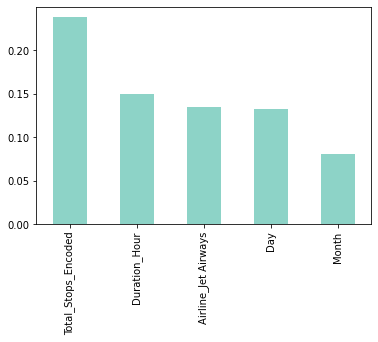

In [74]:
#Let's plot the graph of feature importance for better visualization
feat_importances = pd.Series(ETR.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot.bar()
plt.show()

In [75]:
#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7477, 20)
(3205, 20)
(7477,)
(3205,)


### 4.1 Linear Regression

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
df_test_scaled = scaler.fit_transform(df_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [78]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.572646921040981

In [79]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-8176633.024314411


Very poor training score, therefore we cannot use this model

### 4.2 RandomForest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [81]:
#Hyperparameter optimization using RandomizedSearchCV

#Number of trees in the model
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [82]:
from sklearn.model_selection import RandomizedSearchCV
#Create the random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=1)

In [84]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
predictions = rf_random.predict(X_test)

In [86]:
score = r2_score(y_test,predictions)
score

0.8154496272674501

In [87]:
mse = cross_val_score(rf_random,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.7s
[CV] END max_depth=25, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_fea

In [88]:
rf_random.score(X_train, y_train)

-2092827.1090750364

In [89]:
rf_random.score(X_test, y_test)

-3984436.269368439

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


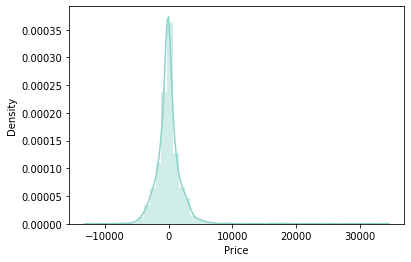

In [90]:
sns.distplot(y_test-predictions)
plt.show()

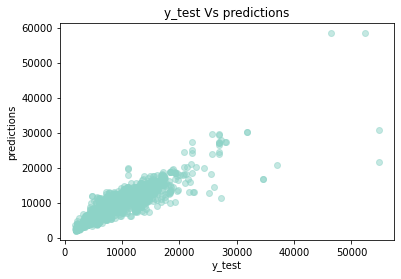

In [91]:
plt.scatter(y_test,predictions,alpha=0.5)
plt.title('y_test Vs predictions')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [92]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1229.7127732671302
MSE: 3984436.269368439
RMSE: 1996.1052751216403


### 4.3 XgBoost Regression

In [93]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([12882.304 ,  6235.3213,  3465.6921, ...,  4641.6274, 10961.845 ,
        7256.966 ], dtype=float32)

In [95]:
score = r2_score(y_test,y_pred)
score

0.8230853279003866

In [96]:
#Hyperparameter optimization using RandomizedSearchCV
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

print(hyperparameter_grid)

{'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]}


In [97]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                               param_distributions=hyperparameter_grid,
                               scoring='neg_mean_squared_error',
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=1)

In [98]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1500; total time=   1.4s
[17:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints

[CV] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.2s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   2.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   2.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   1.6s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   2.0s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_chi

[CV] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1500; total time=   1.0s
[17:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.3s
[17:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_byleve

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [99]:
xgb_predictions = xgb_random.predict(X_test)
xgb_predictions

array([12640.234 ,  6161.236 ,  3496.9575, ...,  4916.6763, 11158.1455,
        7618.2715], dtype=float32)

In [100]:
score = r2_score(y_test,xgb_predictions)
score

0.8144406950392548

In [101]:
mse = cross_val_score(xgb_random,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1500; total time=   0.9s
[17:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints

[CV] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   1.5s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   1.8s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   1.8s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   2.2s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=100; total time=   1.8s
[17:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0

[CV] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1500; total time=   0.8s
[17:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.2s
[17:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_byleve

[CV] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1500; total time=   0.8s
[17:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1500; total time=   0.8s
[17:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "c

[CV] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=900; total time=   0.5s
[17:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=900; total time=   0.5s
[17:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "c

[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.2s
[17:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.2s
[17:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_byleve

[CV] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1500; total time=   0.8s
[17:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=1500; total time=   0.8s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] EN

[CV] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=900; total time=   0.7s
[17:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=900; total time=   0.9s
[17:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "c

[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.2s
[17:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.2s
[17:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_byleve

[CV] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.7s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.7s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.7s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.7s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100; total time=   0.7s
[17:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } mi

[CV] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=900; total time=   0.5s
[17:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=900; total time=   0.5s
[CV] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   2.2s
[CV] E

[CV] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=500; total time=   0.2s
[17:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   0.6s
[17:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel

[CV] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1500; total time=   0.8s
[17:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1500; total time=   0.8s
[17:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_byleve

[CV] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   1.7s
[CV] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   1.7s
[CV] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   1.7s
[17:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]

[CV] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   0.6s
[17:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=3, min_child_weight=4, n_estimators=1100; total time=   0.6s
[17:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel"

c:\users\mahe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


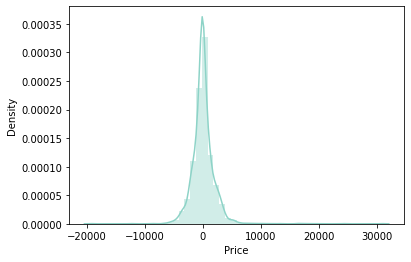

In [102]:
sns.distplot(y_test-xgb_predictions)
plt.show()

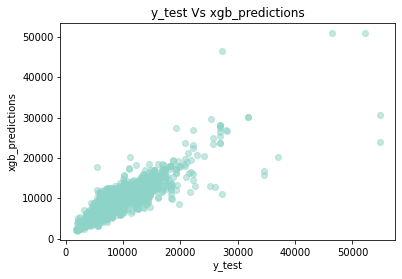

In [103]:
plt.scatter(y_test,xgb_predictions,alpha=0.5)
plt.title('y_test Vs xgb_predictions')
plt.xlabel('y_test')
plt.ylabel('xgb_predictions')
plt.show()

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test,xgb_predictions))
print('MSE:', metrics.mean_squared_error(y_test,xgb_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,xgb_predictions)))

MAE: 1232.4169951202346
MSE: 4006219.0818539066
RMSE: 2001.5541666050176


**RandomForest is giving the most accurate results**

## 5. Pickle File

In [108]:
#Write to disk to use it any number of times
import pickle
file = open('flight.pkl','wb')
pickle.dump(rf_random,file)

In [109]:
model = open('flight.pkl','rb')
random_forest = pickle.load(model)
y_prediction = random_forest.predict(X_test)

In [110]:
r2_score(y_test,y_prediction)

0.8154496272674501